# Pre-post performance models
In this file we are creating models that are based on the dataset that only contain
individual parameters and the preperformance and the postperformance.

In [2]:
import csv
from helpers import print_mean_squared_error, print_coefficient_of_determination, calculate_age
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('./MLmodels')
from DataReader import DataSampleValues
from ModelsRunner import ModelsRunner

In [6]:
# Loads raw data and transforms.

individuals = pd.read_csv("./data/ogasawara_HL/individuals.csv", sep="|")
logs = pd.read_csv("./data/ogasawara_HL/logs.csv", sep="|")

logs.head()
d = {}
for p_id, group in logs.groupby('ID'):
    d[str(p_id)] = group

set_count = len(d.get("0"))

# Generate headers
headers = []
for i in range (set_count):
    headers.append(f"rep{i}")
    headers.append(f"weight{i}")
headers.extend(["Age", "Gender", "Bodyweight", "Preperformance", "Performance"])

data = pd.DataFrame(columns=headers)
data.columns

# Transform data
for index, ind in individuals.iterrows():
    entry = []
    p_id = str(ind.get("ID"))
    
    for index, row in d.get(p_id).iterrows():
        entry.append(row["Reps"])
        entry.append(row["Weight"])
    
    entry.append(calculate_age(ind["Birth"]))
    entry.append(ind["Gender"])
    entry.append(ind["Weight"])
    
    preperformance = d.get(p_id)["Performance"].values[0]
    postperformance = d.get(p_id)["Performance"].values[-1]
    entry.append(preperformance)
    entry.append(postperformance)
    
    data = data.append(pd.Series(entry, index=data.columns), ignore_index=True)
    
data.head()


,rep0,weight0,rep1,weight1,rep2,weight2,rep3,weight3,rep4,weight4,...,weight51,rep52,weight52,rep53,weight53,Age,Gender,Bodyweight,Preperformance,Performance
0,10.0,72.00,10.0,72.00,10.0,72.00,10.0,72.00,10.0,72.00,...,72.00,10.0,72.00,10.0,72.00,27.0,1.0,46.104631,96.0,133.920162
1,10.0,81.00,10.0,81.00,10.0,81.00,10.0,81.00,10.0,81.00,...,81.00,10.0,81.00,10.0,81.00,38.0,1.0,55.342524,108.0,146.629836
2,10.0,75.75,10.0,75.75,10.0,75.75,10.0,75.75,10.0,75.75,...,75.75,10.0,75.75,10.0,75.75,26.0,1.0,53.947723,101.0,139.230566
3,10.0,79.50,10.0,79.50,10.0,79.50,10.0,79.50,10.0,79.50,...,79.50,10.0,79.50,10.0,79.50,27.0,1.0,44.023354,106.0,144.519665
4,10.0,70.50,10.0,70.50,10.0,70.50,10.0,70.50,10.0,70.50,...,70.50,10.0,70.50,10.0,70.50,13.0,0.0,56.867971,94.0,131.789482


In [7]:
data = data[["Age", "Gender", "Bodyweight", "Preperformance", "Performance"]]
data.head()


,Age,Gender,Bodyweight,Preperformance,Performance
0,27.0,1.0,46.104631,96.0,133.920162
1,38.0,1.0,55.342524,108.0,146.629836
2,26.0,1.0,53.947723,101.0,139.230566
3,27.0,1.0,44.023354,106.0,144.519665
4,13.0,0.0,56.867971,94.0,131.789482


In [ ]:
# Split into training set and testing set.

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('Performance', axis=1)
Y = data_shuffled['Performance']

data_holder = DataSampleValues(x=X, y=Y)

____________________________________________________

The Training results of Lasso model are : 
Mean squared error: 0.00
Coefficient of determination: 1.00
____________________________________________________



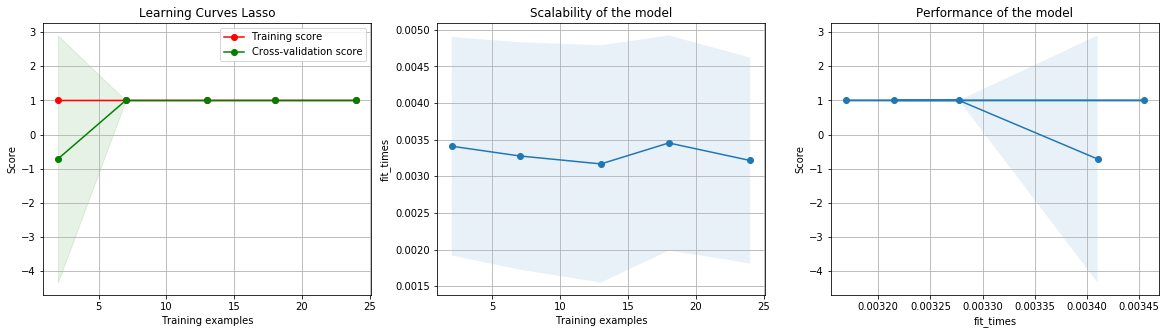

____________________________________________________

The Training results of Ridge model are : 
Mean squared error: 0.00
Coefficient of determination: 1.00
____________________________________________________



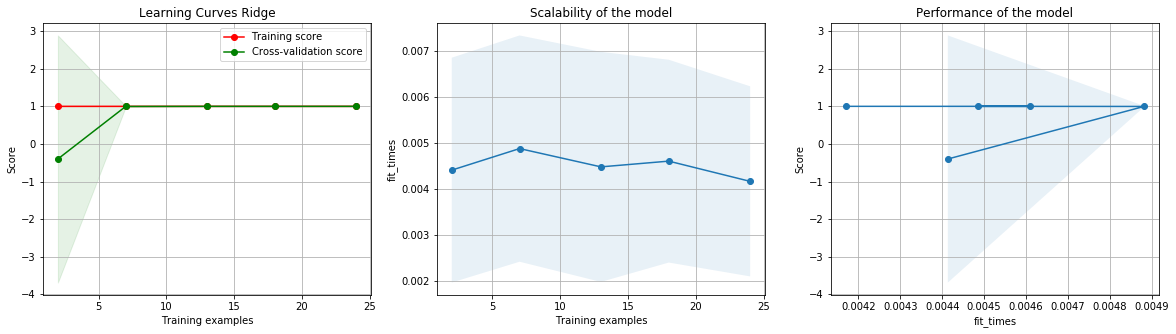

____________________________________________________

The Training results of Elastic Net model are : 
Mean squared error: 0.07
Coefficient of determination: 0.99
____________________________________________________



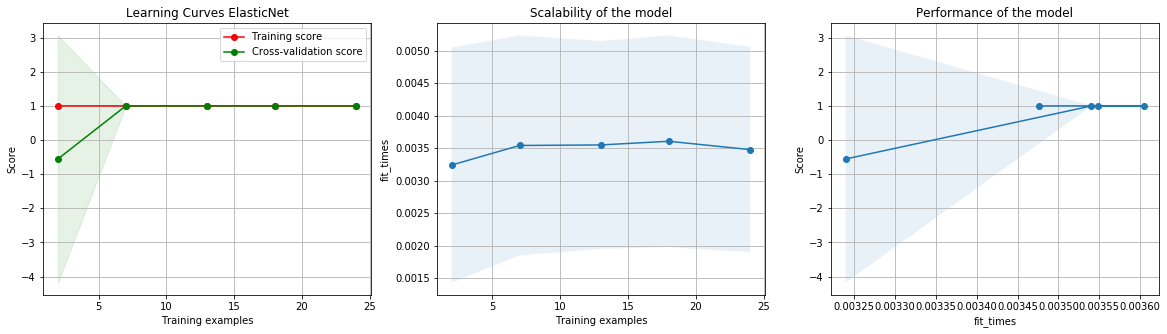

____________________________________________________

The Training results of Decision Tree model are : 
Mean squared error: 0.34
Coefficient of determination: 0.97
____________________________________________________



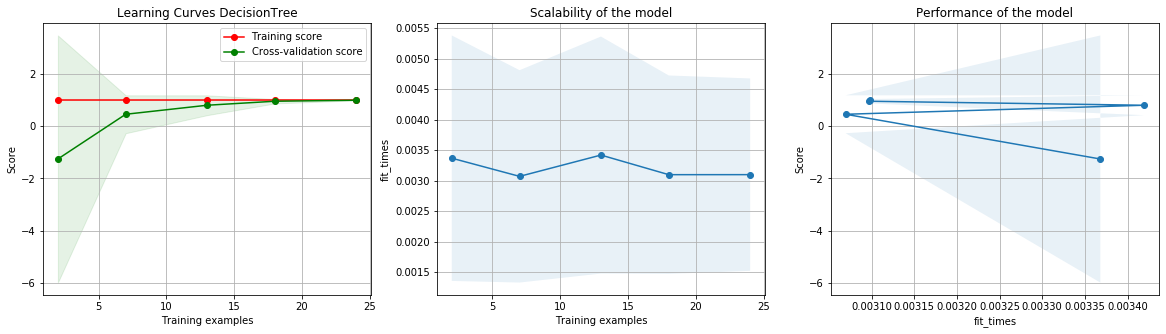

____________________________________________________

The Training results of Random Forest model are : 
Mean squared error: 0.45
Coefficient of determination: 0.97
____________________________________________________



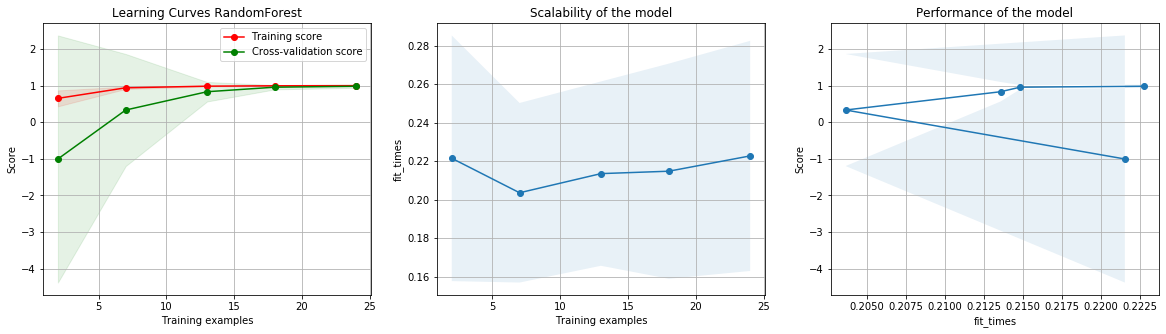

____________________________________________________

The Training results of NeuralNetwork model are : 
Mean squared error: 0.69
Coefficient of determination: 0.95
____________________________________________________



In [ ]:
models_runner = ModelsRunner(data_sample=data_holder)
models_runner.train_all_models_and_plot_curves()

# Save model
Saves the choosen model(s) to a file to be used in the recommendation engine.

In [ ]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

# This exports all models, then you can choose to save the one that performs the best, rename it and then move to recommendation engine.
#models_runner.train_all_models_on_specific_data_and_then_save_them_all_as_binary_sav_files(data_holder.X, data_holder.Y)